I will used enrollement data and choose the grade 12 year by school by summing the male and female enrolement data from enr20202022-v2.txt and compare it to the one year graduation data from graduates2021.

In [58]:
#collect graduate data from 2020-2021

import pandas as pd

dfGrads21 = pd.read_excel("graduates2021.xlsx", sheet_name= "One-Year Graduate (N)")
#Only want school based data
dfGrads21 = dfGrads21[dfGrads21['Unnamed: 1'] == "S"]
dfGrads21 = dfGrads21.drop(['Unnamed: 1', 'Unnamed: 5', 'Unnamed: 6'], axis = 1)
dfGrads21 = dfGrads21.rename(columns={"One-Year Graduate Counts":"Academic Year", "Unnamed: 2":"County Code", "Unnamed: 3": "District Code", "Unnamed: 4":"School Code", "Unnamed: 7":"School Name", "Unnamed: 8":"Reporting Category", "Unnamed: 9":"Graduate count"})
#total grads of 2021
dfGrads21 = dfGrads21[dfGrads21['Reporting Category'] == 'TA']

dfGrads21['County Code'] = dfGrads21['County Code'].astype(str)
dfGrads21['District Code'] = dfGrads21['District Code'].astype(str)
dfGrads21['School Code'] = dfGrads21['School Code'].astype(str)

dfGrads21['CDS_CODE'] = dfGrads21['County Code'] + dfGrads21['District Code'] + dfGrads21['School Code']

dfGrads21 = dfGrads21.drop(['2020-21 CALPADS \nOne-Year Graduate Counts', 'County Code', 'District Code', 'School Code', 'Reporting Category'], axis = 1)

dfGrads21.to_csv('grads21.csv', index = None)

dfGrads21

,School Name,Graduate count,CDS_CODE
48,Envision Academy for Arts & Technology,88,01100170112607
57,Alameda County Juvenile Hall/Court,18,01100170130401
69,Alameda County Community,28,01100170130419
82,Connecting Waters Charter - East Bay,17,01100170136101
99,Opportunity Academy,157,01100170136226
...,...,...,...
39930,South Lindhurst Continuation High,80,58727365830096
39939,Marysville Charter Academy for the Arts,53,58727365830138
39956,Marysville High,183,58727365835202
39985,Edward P. Duplex,31,58727690133751


Grade 12 enrollments

In [103]:
dfGr12Enroll = pd.read_csv("enr202022-v2.txt", delimiter= '\t', low_memory=False, on_bad_lines='skip', encoding = 'unicode_escape')
#only graduates of 2021
dfGr12Enroll = dfGr12Enroll[dfGr12Enroll["ACADEMIC_YEAR"] == "2020-21"]
#only students who use this as their primary school
dfGr12Enroll = dfGr12Enroll[dfGr12Enroll["ENR_TYPE"] == "C"]
#only Grade 12 students
dfGr12Enroll = dfGr12Enroll[dfGr12Enroll["GR_12"] != 0]

dfGr12Enroll = dfGr12Enroll.drop(['ACADEMIC_YEAR', 'COUNTY', 'DISTRICT', 'ENR_TYPE', 'GR_KN', 'GR_1', 'GR_2', 'GR_3', 'GR_4', 'GR_5', 'GR_6', 'GR_7', 'GR_8', 'GR_9', 'GR_10', 'GR_11', 'UNGR_SEC', 'ENR_TOTAL', 'UNGR_ELM', 'ADULT'], axis = 1)

dfGr12EnrollTOT = dfGr12Enroll.groupby(['CDS_CODE'])['GR_12'].sum()

dfEnrollSchool = pd.merge(dfGr12Enroll, dfGr12EnrollTOT, how = 'outer', on = 'CDS_CODE')

dfEnrollSchool = dfEnrollSchool.drop(['RACE_ETHNICITY', 'GENDER', 'GR_12_x'], axis = 1)
dfEnrollSchool = dfEnrollSchool.rename(columns={"GR_12_y":"Grade 12 Enrollment", "SCHOOL":"School Name"})
dfEnrollSchool = dfEnrollSchool.drop_duplicates(subset=['CDS_CODE'])
dfEnrollSchool['CDS_CODE'] = dfEnrollSchool['CDS_CODE'].astype(str)

dfEnrollSchool

,CDS_CODE,School Name,Grade 12 Enrollment
0,1100170112607,Envision Academy for Arts & Technology,88
9,1100170130401,Alameda County Juvenile Hall/Court,15
12,1100170130419,Alameda County Community,22
17,1100170136101,Connecting Waters Charter - East Bay,15
28,1100170136226,Opportunity Academy,83
...,...,...,...
24920,58727365830096,South Lindhurst Continuation High,84
24930,58727365830138,Marysville Charter Academy for the Arts,50
24938,58727365835202,Marysville High,205
24952,58727690133751,Edward P. Duplex,38


In [115]:
#merging Enrollment and Graduation to get graduation Rate
#dfEnrollSchool['CDS_CODE'] = dfEnrollSchool['CDS_CODE'].astype(str)

dfGraduation21 = dfEnrollSchool.merge(dfGrads21, on = 'CDS_CODE')
dfGraduation21['Graduation Rate'] = dfGraduation21['Graduate count'] / dfGraduation21['Grade 12 Enrollment']
dfGraduation21 = dfGraduation21.drop("School Name_x", axis = 1)
dfGraduation21 = dfGraduation21.rename(columns={"School Name_y":"School Name"})
dfGraduation21.loc[dfGraduation21['Graduation Rate'] > 1, 'Graduation Rate'] = 1

dfGraduation21
                          

,CDS_CODE,Grade 12 Enrollment,School Name,Graduate count,Graduation Rate
0,10101080109991,115,Crescent View West Public Charter,215,1
1,10101080111682,9,Hume Lake Charter,10,1
2,10101080119628,72,Big Picture Educational Academy,111,1
3,10101081030337,19,Alice M. Worsley,23,1
4,10101081030899,14,Violet Heintz Education Academy,6,0.428571
...,...,...,...,...,...
2319,58727365830096,84,South Lindhurst Continuation High,80,0.952381
2320,58727365830138,50,Marysville Charter Academy for the Arts,53,1
2321,58727365835202,205,Marysville High,183,0.892683
2322,58727690133751,38,Edward P. Duplex,31,0.815789


Chronic Absenteeism by school

In [107]:
dfChronAbs21 = pd.read_csv("chronicabsenteeism21.txt", delimiter= '\t', low_memory=False, on_bad_lines='skip', encoding = 'unicode_escape')
dfChronAbs21 = dfChronAbs21[dfChronAbs21['Aggregate Level'] == "S"]
dfChronAbs21 = dfChronAbs21[dfChronAbs21['Reporting Category'] == "GR912"]

dfChronAbs21 = dfChronAbs21.drop(['Aggregate Level', 'County Name','District Name', 'Charter School', 'ChronicAbsenteeismEligibleCumula', 'ChronicAbsenteeismCount', 'Academic Year', 'County Code', 'District Code', 'School Code', 'Reporting Category'], axis = 1)

'''

#ensuring the codes are the correct length
dfChronAbs21['District Code'] = dfChronAbs21['District Code'].astype(int)
dfChronAbs21['School Code'] = dfChronAbs21['School Code'].astype(int)
dfChronAbs21['District Code'] = dfChronAbs21['District Code'].astype(str)
dfChronAbs21['School Code'] = dfChronAbs21['School Code'].astype(str)
dfChronAbs21['County Code'] = dfChronAbs21['County Code'].astype(str)

#County Codes should be two digits
dfTwoDigCounty = dfChronAbs21[dfChronAbs21['County Code'].str.len() < 2]
dfTwoDigCounty['County Code'] = "0" + dfTwoDigCounty['County Code']
#df1 = [df1['DistrictCode'].str.len() == 5]
#dfChronAbs21['DistrictCode'] = dfChronAbs21['DistrictCode'].str[:-2]+"0"

dfChronAbs21['School Code'] = dfChronAbs21['School Code'].astype(str)
#df1 = df1[df1['School Code'].str.len() == 7]
dfChronAbs21['School Code'] = dfChronAbs21['School Code'].str[:-2]

#codelength = (df1['DistrictCode'].str.len() == 5) & (df1['SchoolCode'].str.len() == 7)
#df1 = df1.loc[codelength]
              
dfChronAbs21['CDS_CODE'] = dfChronAbs21['CountyCode'].astype(str) + dfChronAbs21['DistrictCode'] + dfChronAbs21['SchoolCode']
dfChronAbs21 = dfChronAbs21.drop(['CountyCode', 'DistrictCode', 'SchoolCode', 'AcademicYear', 'ReportingCategory'], axis = 1)

dfChronAbs21 = dfChronAbs21.rename(columns={"AcademicYear":"Academic Year", "DistrictName":"District Name", "SchoolName":"School Name", "ReportingCategory":"Reporting Category", "ChronicAbsenteeismRate":"School Absentee Rate"})
dfChronAbs21 = dfChronAbs21[dfChronAbs21['School Absentee Rate'].notnull()]

#reorder the columns with CDS CODE as Column 1
#df1 = df1[['CDS_CODE',
dfChronAbs21 = dfChronAbs21.sort_values('CDS_CODE')
dfChronAbs21['CDS_CODE'] = dfChronAbs21['CDS_CODE'].astype(str)
dfChronAbs21.to_csv('chronicabsenteeism21.csv', index = None)
'''
#dfChronAbs21
dfChronAbs21

,School Name,ChronicAbsenteeismRate
57386,Alameda County Juvenile Hall/Court,61.2
57387,Alameda County Community,84.3
57388,Envision Academy for Arts & Technology,38.5
57389,Connecting Waters Charter - East Bay,0.8
57390,Opportunity Academy,53.1
...,...,...
262454,"Nonpublic, Nonsectarian Schools",NaN
262455,South Lindhurst Continuation High,85.0
263016,Wheatland Union High,16.9
263017,Edward P. Duplex,100.0


In [116]:
#merge absenteeism rate with the rest
dfAllData = dfGraduation21.merge(dfChronAbs21, on = 'School Name')
#dfAllData = pd.concat([dfGraduation21, dfChronAbs21], axis = 1)
dfAllData

,CDS_CODE,Grade 12 Enrollment,School Name,Graduate count,Graduation Rate,ChronicAbsenteeismRate
0,10101080109991,115,Crescent View West Public Charter,215,1,53.9
1,10101080111682,9,Hume Lake Charter,10,1,22.6
2,10101080119628,72,Big Picture Educational Academy,111,1,29.3
3,10101081030337,19,Alice M. Worsley,23,1,3.3
4,10101081030899,14,Violet Heintz Education Academy,6,0.428571,84.3
...,...,...,...,...,...,...
4437,58727365830096,84,South Lindhurst Continuation High,80,0.952381,85.0
4438,58727365830138,50,Marysville Charter Academy for the Arts,53,1,1.6
4439,58727365835202,205,Marysville High,183,0.892683,21.1
4440,58727690133751,38,Edward P. Duplex,31,0.815789,100.0


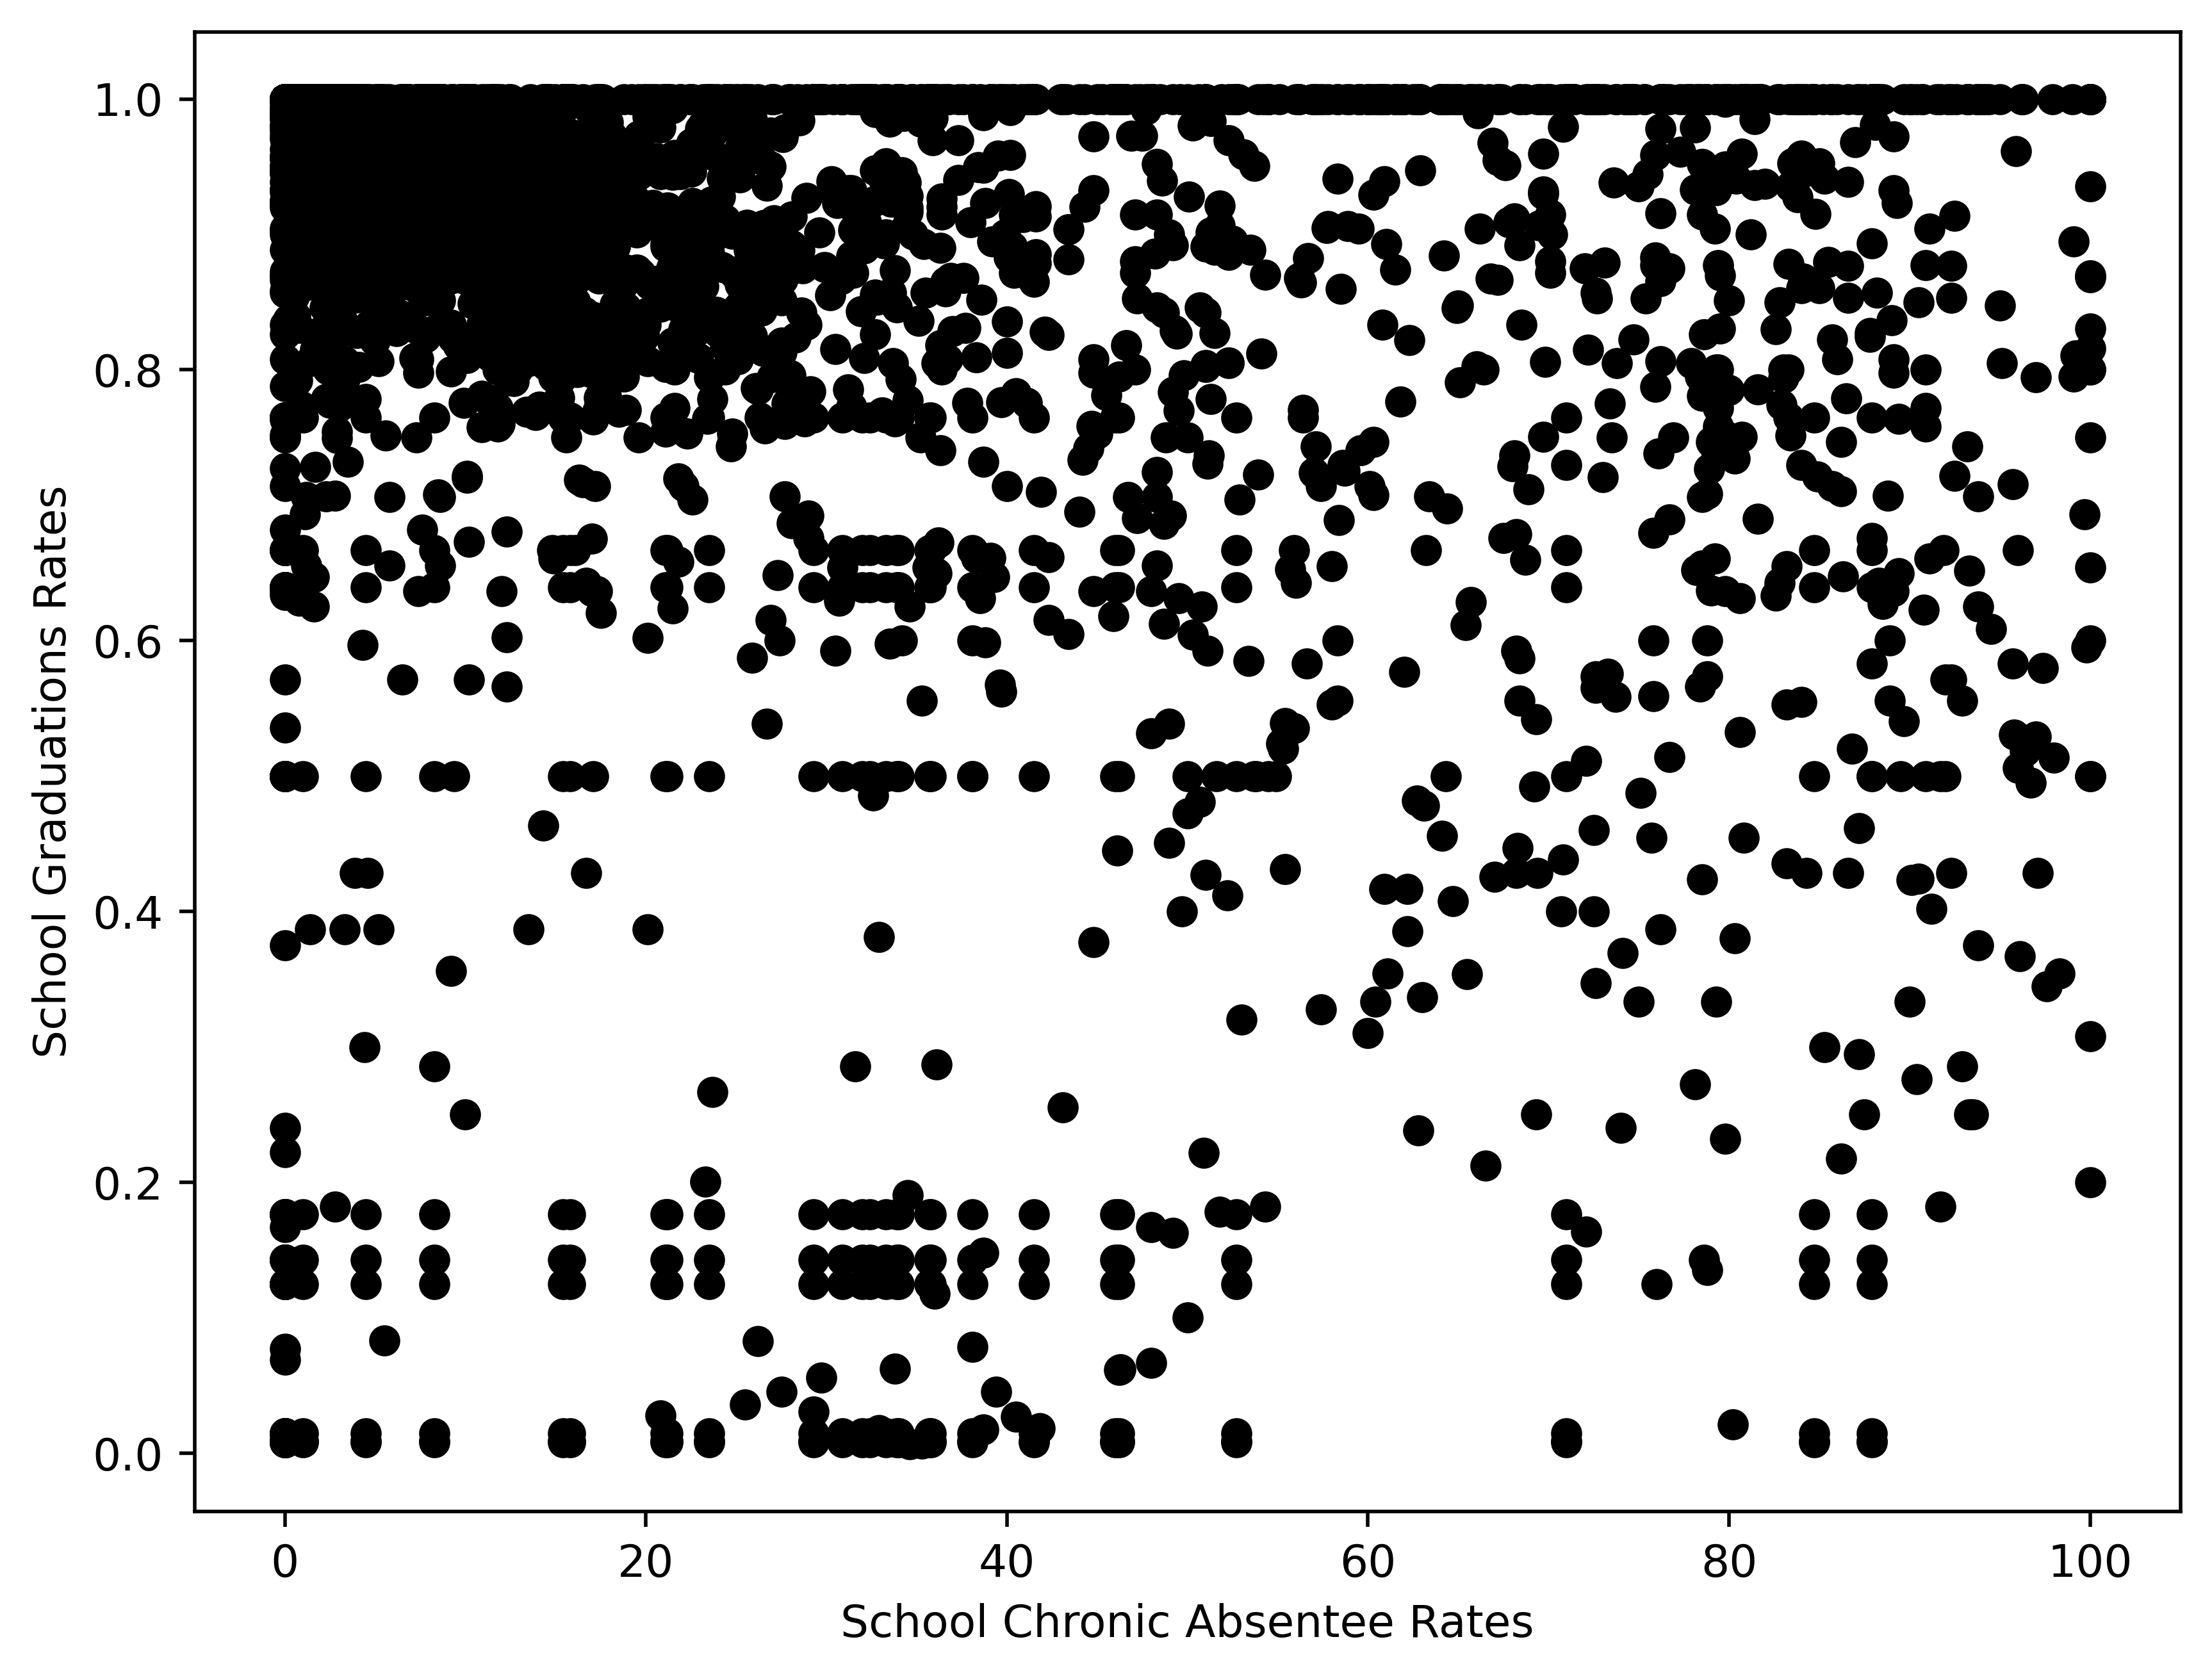

In [117]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import haversine_distances
import matplotlib.patches as patches

absentees = dfAllData['ChronicAbsenteeismRate'].to_list()
grads = dfAllData['Graduation Rate'].to_list()

plt.figure(figsize=(8,6), dpi = 500)
plt.plot(absentees, grads, 'ko')
plt.xlabel('School Chronic Absentee Rates')
plt.ylabel('School Graduations Rates')
plt.show()

In [119]:
def linear_regression_dropoutrisk(absenteerate, dropoutrate):
    
    '''
    Performs linear regression on the given absentee rates and dropout rates
    
    Args:
        absentee_rates: a list of absentee rates for various schools
        dropout_rates: a list of dropout rates for the same schools
    Returns:
        a tuple of the slope and the intercept of the linear regression line
    '''
    
    absentee_rate = np.array(absentees)
    dropout_rate = np.array(dropouts)
    
    #calculate mean values
    mean_absentee_rate = np.mean(absentee_rate)
    mean_dropout_rate = np.mean(dropout_rate)
    
    #numerator and demoninator for slope
    numerator = np.sum((absentee_rate - mean_absentee_rate) * (dropout_rate - mean_dropout_rate))
    denominator = np.sum((absentee_rate - mean_absentee_rate) **2)
    
    #slope
    m = numerator/denominator
    b = mean_dropout_rate - m * mean_absentee_rate
    
    return m,b

In [ ]:
#Do linear regression
slope, intercept = linear_regression_dropoutrisk(absentees, dropouts)

#print slop and intercept for these data
print("Slope (m):", round(slope,6), 'Percent School Dropouts/Percent School Absenteeism')
print("Intercept (b):", round(intercept,6))

#arrays for the line
regression_x = np.array([np.min(absentees), np.max(absentees)])
regression_y = slope * regression_x + intercept

plt.figure(figsize=(8,6), dpi = 500)
plt.plot(absentees, dropouts, 'ko')
plt.plot(regression_x, regression_y,'r-')
plt.xlabel('School Absentee Rates')
plt.ylabel('School Dropout Rates')
plt.show()